<a href="https://colab.research.google.com/github/Mbigdeli2003/Linear_Control_Systems_Workshop/blob/main/session2_State_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Realization

##Controllable Canonical Form

A matrix:
 [[-4. -6. -3. -8.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
B matrix:
 [[1.]
 [0.]
 [0.]
 [0.]]
C matrix:
 [[5. 3. 7. 2.]]
D matrix:
 [[0.]]


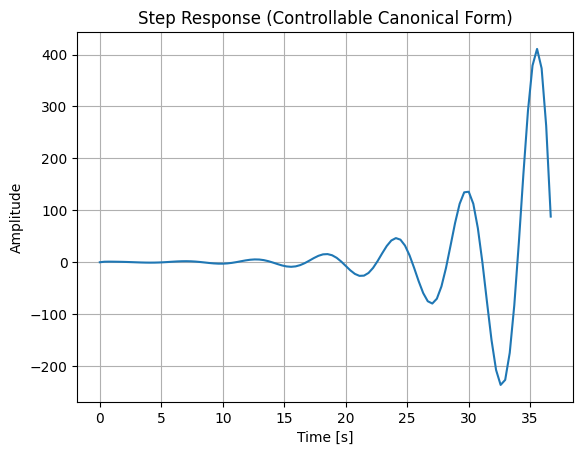

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Define the numerator and denominator
num = [5, 3, 7, 2]
den = [1, 4, 6, 3, 8]

# Create the transfer function
sys = signal.TransferFunction(num, den)

# Convert to state-space
A, B, C, D = signal.tf2ss(num, den)

# Print state-space matrices
print("A matrix:\n", A)
print("B matrix:\n", B)
print("C matrix:\n", C)
print("D matrix:\n", D)

# Plot step response
t, y = signal.step(sys)
plt.plot(t, y)
plt.title('Step Response (Controllable Canonical Form)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


##Observable Canonical Form

A matrix (observable):
 [[-4. -6. -3. -8.]
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]]
B matrix (observable):
 [[0.]
 [0.]
 [0.]
 [1.]]
C matrix (observable):
 [5. 3. 7. 2.]
D matrix (observable):
 0


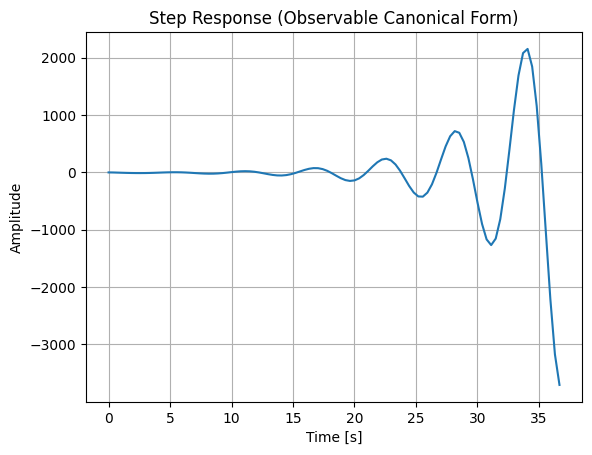

In [ ]:
import numpy as np
import scipy.signal as signal
from scipy.linalg import companion
import matplotlib.pyplot as plt

# Define numerator and denominator
num = [5, 3, 7, 2]  # Coefficients of N(s)
den = [1, 4, 6, 3, 8]  # Coefficients of D(s)

# Define the companion matrix for the denominator (observable canonical form)
A_obs = companion(den)

# Construct B, C, and D matrices manually for observable canonical form
B_obs = np.zeros((len(den) - 1, 1))
B_obs[-1] = 1  # Last element is 1

# To align the C matrix, we extend the numerator to match the size of the denominator.
# Since `num` is shorter than `den`, we pad `num` with leading zeros.
num_padded = np.pad(num, (len(den) - len(num), 0), 'constant')

# Now calculate the C matrix by taking the last n-1 coefficients
C_obs = num_padded[1:] - num_padded[0] * A_obs[0]

# Direct feedthrough matrix
D_obs = num_padded[0]

# Print the state-space matrices
print("A matrix (observable):\n", A_obs)
print("B matrix (observable):\n", B_obs)
print("C matrix (observable):\n", C_obs)
print("D matrix (observable):\n", D_obs)

# Construct the state-space system and plot the step response
sys_obs = signal.StateSpace(A_obs, B_obs, C_obs, D_obs)
t, y = signal.step(sys_obs)

# Plotting the step response
plt.plot(t, y)
plt.title('Step Response (Observable Canonical Form)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## Diagonal Canonical Form

Diagonalized A matrix (J):
 [[-2.19084161+1.27594644j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -2.19084161-1.27594644j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.19084161+1.09916704j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.19084161-1.09916704j]]
Transformation matrix (T):
 [[ 9.19196040e-01+0.j          9.19196040e-01-0.j
   5.80477500e-01+0.j          5.80477500e-01-0.j        ]
 [-3.13296105e-01-0.18246369j -3.13296105e-01+0.18246369j
   8.90087314e-02-0.51265268j  8.90087314e-02+0.51265268j]
 [ 7.05632397e-02+0.12438079j  7.05632397e-02-0.12438079j
  -4.39104386e-01-0.15721734j -4.39104386e-01+0.15721734j]
 [ 6.39460469e-04-0.05640064j  6.39460469e-04+0.05640064j
  -2.06178562e-01+0.3636908j  -2.06178562e-01-0.3636908j ]]


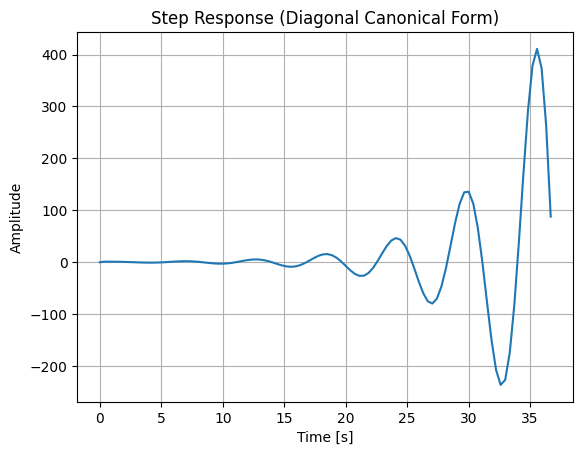

In [ ]:
from scipy.linalg import eig

# Compute eigenvalues and eigenvectors
eigenvalues, T = eig(A)

# Diagonal matrix
J = np.diag(eigenvalues)

print("Diagonalized A matrix (J):\n", J)
print("Transformation matrix (T):\n", T)

# Recalculate B, C using the transformation
B_diag = np.dot(np.linalg.inv(T), B)
C_diag = np.dot(C, T)

# Create state-space system
sys_diag = signal.StateSpace(J, B_diag, C_diag, D)

# Step response for diagonal form
t, y = signal.step(sys_diag)
plt.plot(t, y)
plt.title('Step Response (Diagonal Canonical Form)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()


## By ctrl toolbox

In [ ]:
pip install control matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00


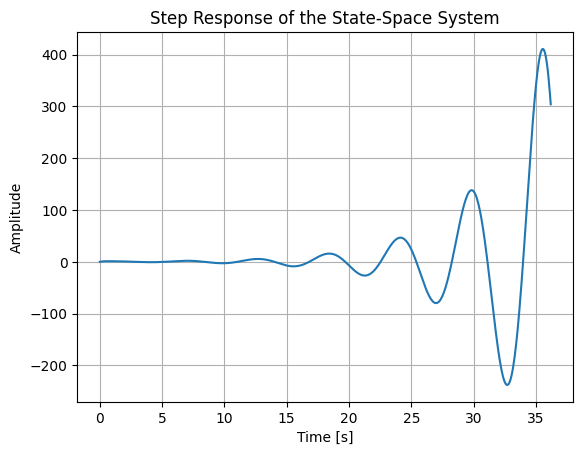

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import ss, step_response, tf

# Define the numerator and denominator for the transfer function
num = [5, 3, 7, 2]  # Coefficients of the numerator
den = [1, 4, 6, 3, 8]  # Coefficients of the denominator

# Define the state-space system (controllable canonical form)
A = np.array([[-4, -6, -3, -8],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

B = np.array([[1],
              [0],
              [0],
              [0]])

C = np.array([[5, 3, 7, 2]])

D = np.array([[0]])

# Create the state-space system
sys = ss(A, B, C, D)

# Generate the step response of the system
t, y = step_response(sys)

# Plot the step response
plt.plot(t, y)
plt.title('Step Response of the State-Space System')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


##STM

In [ ]:
pip install sympy numpy matplotlib


⎡     ⅈ⋅ω⋅t    -ⅈ⋅ω⋅t           ⅈ⋅ω⋅t      -ⅈ⋅ω⋅t⎤
⎢    ℯ        ℯ              ⅈ⋅ℯ        ⅈ⋅ℯ      ⎥
⎢    ────── + ───────      - ──────── + ─────────⎥
⎢      2         2             2⋅ω         2⋅ω   ⎥
⎢                                                ⎥
⎢     ⅈ⋅ω⋅t        -ⅈ⋅ω⋅t      ⅈ⋅ω⋅t    -ⅈ⋅ω⋅t   ⎥
⎢ⅈ⋅ω⋅ℯ        ⅈ⋅ω⋅ℯ           ℯ        ℯ         ⎥
⎢────────── - ───────────     ────── + ───────   ⎥
⎣    2             2            2         2      ⎦


<ipython-input-2-d6581fc96323>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi_t_num[:, :, i] = Phi_t_func(t_val, omega_val)


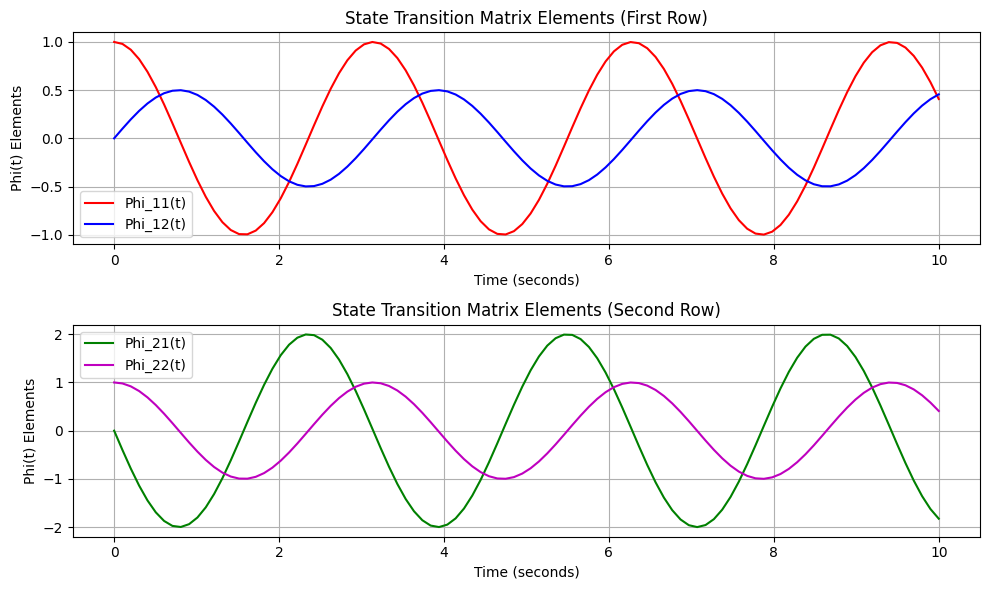

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define symbolic variables for time (t) and angular frequency (omega)
t, omega = sp.symbols('t omega')

# Define the state-space matrix A for a harmonic oscillator
A = sp.Matrix([[0, 1], [-omega**2, 0]])

# Compute the state transition matrix Phi(t) = exp(A*t)
Phi_t = sp.exp(A * t)

# Display the parametric state transition matrix
sp.pprint(Phi_t)

# Define numerical values for omega and time
omega_val = 2  # Example angular frequency
t_values = np.linspace(0, 10, 100)  # Time values from 0 to 10 seconds

# Convert the symbolic state transition matrix to a numerical function
Phi_t_func = sp.lambdify([t, omega], Phi_t, modules='numpy')

# Preallocate for storing numerical state transition matrices
Phi_t_num = np.zeros((2, 2, len(t_values)))

# Compute Phi(t) for each time step
for i, t_val in enumerate(t_values):
    Phi_t_num[:, :, i] = Phi_t_func(t_val, omega_val)

# Plot the elements of Phi(t) over time
plt.figure(figsize=(10, 6))

# Plot Phi_11(t) and Phi_12(t)
plt.subplot(2, 1, 1)
plt.plot(t_values, Phi_t_num[0, 0, :], label='Phi_11(t)', color='r')
plt.plot(t_values, Phi_t_num[0, 1, :], label='Phi_12(t)', color='b')
plt.title('State Transition Matrix Elements (First Row)')
plt.xlabel('Time (seconds)')
plt.ylabel('Phi(t) Elements')
plt.grid(True)
plt.legend()

# Plot Phi_21(t) and Phi_22(t)
plt.subplot(2, 1, 2)
plt.plot(t_values, Phi_t_num[1, 0, :], label='Phi_21(t)', color='g')
plt.plot(t_values, Phi_t_num[1, 1, :], label='Phi_22(t)', color='m')
plt.title('State Transition Matrix Elements (Second Row)')
plt.xlabel('Time (seconds)')
plt.ylabel('Phi(t) Elements')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
